<a href="https://colab.research.google.com/github/HILALOZTEMEL/Stock_Price_Forecast/blob/main/Stock_Price_Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Veri setini yükleyin
data = pd.read_csv('/content/drive/MyDrive/Stock_Price_Forecast/Dataset/ISCTR_IS.csv')

data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-02-17,2.970060,2.997060,2.902558,2.902558,2.349932,55057948.0
1,2015-02-18,2.920559,2.979060,2.916059,2.956560,2.393652,31801480.0
2,2015-02-19,3.006061,3.006061,2.965560,2.992560,2.422798,37002206.0
3,2015-02-20,2.988060,2.988060,2.929559,2.938559,2.379078,30158007.0
4,2015-02-23,2.866558,2.889058,2.857558,2.875558,2.328072,83954148.0


# Veri Ön İşleme


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2057 entries, 0 to 2056
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2057 non-null   object 
 1   Open       2056 non-null   float64
 2   High       2056 non-null   float64
 3   Low        2056 non-null   float64
 4   Close      2056 non-null   float64
 5   Adj Close  2056 non-null   float64
 6   Volume     2056 non-null   float64
dtypes: float64(6), object(1)
memory usage: 112.6+ KB


In [5]:
# Eksik verileri kontrol edin ve gerekirse doldurun
print(data.isnull().sum())

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64


In [6]:
data.dropna(inplace = True)

In [7]:
# Eksik verileri kontrol edin
print(data.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [9]:
# Assuming 'Date' column is in string format, convert it to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Create new columns for year, month, and day
data['Year_Name'] = data['Date'].dt.year
data['Month_Name'] = data['Date'].dt.month
data['Day_Name'] = data['Date'].dt.day
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year_Name,Month_Name,Day_Name
0,2015-02-17,2.970060,2.997060,2.902558,2.902558,2.349932,55057948.0,2015,2,17
1,2015-02-18,2.920559,2.979060,2.916059,2.956560,2.393652,31801480.0,2015,2,18
2,2015-02-19,3.006061,3.006061,2.965560,2.992560,2.422798,37002206.0,2015,2,19
3,2015-02-20,2.988060,2.988060,2.929559,2.938559,2.379078,30158007.0,2015,2,20
4,2015-02-23,2.866558,2.889058,2.857558,2.875558,2.328072,83954148.0,2015,2,23


In [10]:
data = data.drop(columns = ['Date'])
data.head()

,Open,High,Low,Close,Adj Close,Volume,Year_Name,Month_Name,Day_Name
0,2.970060,2.997060,2.902558,2.902558,2.349932,55057948.0,2015,2,17
1,2.920559,2.979060,2.916059,2.956560,2.393652,31801480.0,2015,2,18
2,3.006061,3.006061,2.965560,2.992560,2.422798,37002206.0,2015,2,19
3,2.988060,2.988060,2.929559,2.938559,2.379078,30158007.0,2015,2,20
4,2.866558,2.889058,2.857558,2.875558,2.328072,83954148.0,2015,2,23


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2056 entries, 0 to 2056
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        2056 non-null   float64
 1   High        2056 non-null   float64
 2   Low         2056 non-null   float64
 3   Close       2056 non-null   float64
 4   Adj Close   2056 non-null   float64
 5   Volume      2056 non-null   float64
 6   Year_Name   2056 non-null   int64  
 7   Month_Name  2056 non-null   int64  
 8   Day_Name    2056 non-null   int64  
dtypes: float64(6), int64(3)
memory usage: 160.6 KB


# Model Eğitimi

In [12]:
# Bağımlı değişken (Close) ve bağımsız değişkenleri (özellikler) ayırın
X = data.drop('Close',axis=1)
y = data['Close']

# Verileri eğitim ve test kümelerine bölelim
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

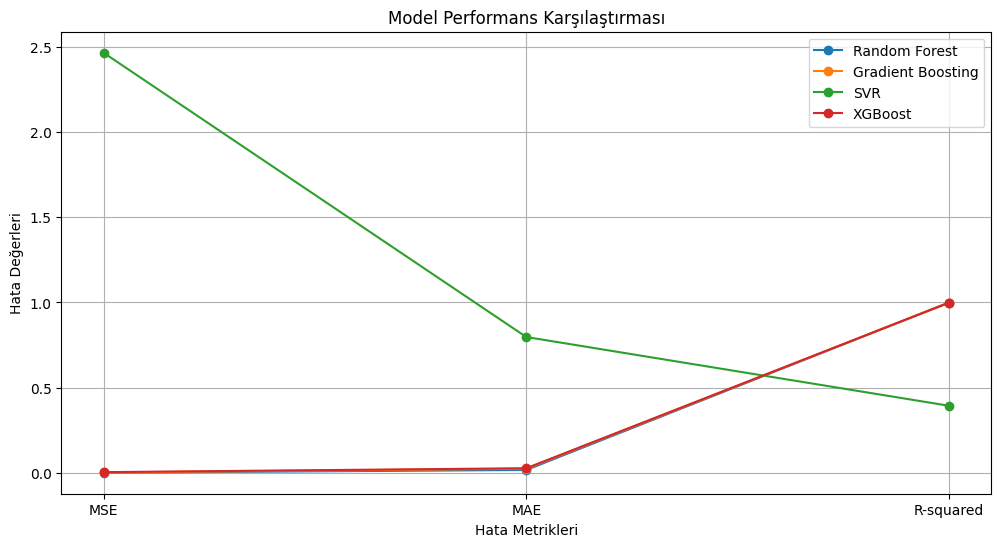

In [13]:
# Farklı algoritmaları kullanarak modeller oluşturun
models = {
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'SVR': SVR(),
    'XGBoost': XGBRegressor()
}

results = {}  # Model performans sonuçlarını saklamak için bir sözlük
comparisons = {} # Model sonucunda tahmin değerleri ile gerçek değerleri karşılaştırmak için sözlük

# Modelleri eğitin ve performans sonuçlarını kaydedin
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    comparisons[name] = {'y_test' : y_test,'y_pred' : y_pred}
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'MAE': mae, 'R-squared': r2}

# Sonuçları görselleştirin
plt.figure(figsize=(12, 6))
for name, result in results.items():
    plt.plot(list(result.keys()), list(result.values()), marker='o', label=name)

plt.xlabel('Hata Metrikleri')
plt.ylabel('Hata Değerleri')
plt.title('Model Performans Karşılaştırması')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
# Model performans sonuçlarını çıktılayın
print("Model Performans Sonuçları:")
for name, result in results.items():
    print(f"{name} Modeli:")
    print("Mean Squared Error (MSE):", result['MSE'])
    print("Mean Absolute Error (MAE):", result['MAE'])
    print("R-squared:", result['R-squared'])
    print("\n")

Model Performans Sonuçları:
Random Forest Modeli:
Mean Squared Error (MSE): 0.0014889556824891877
Mean Absolute Error (MAE): 0.01759100692058337
R-squared: 0.9996340305105752


Gradient Boosting Modeli:
Mean Squared Error (MSE): 0.0028409861842840357
Mean Absolute Error (MAE): 0.024867453038580973
R-squared: 0.9993017157759947


SVR Modeli:
Mean Squared Error (MSE): 2.464794003268948
Mean Absolute Error (MAE): 0.7974579339707961
R-squared: 0.3941798177595065


XGBoost Modeli:
Mean Squared Error (MSE): 0.0048821771225170466
Mean Absolute Error (MAE): 0.02774863049500648
R-squared: 0.9988000127271606




In [15]:
# Tahmin edilen değerlerle gerçek değerleri karşılaştırın
# Model performans sonuçlarını çıktılayın
print("Model Performans Sonuçları:")
for name, comparison in comparisons.items():
    print(f"{name} Modeli:")
    comparison_df = pd.DataFrame({'Gerçek Değerler': comparison['y_test'], 'Tahmin Edilen Değerler': comparison['y_pred'] })

    print(comparison_df)
    print("\n")


Model Performans Sonuçları:
Random Forest Modeli:
      Gerçek Değerler  Tahmin Edilen Değerler
184          2.416549                2.416549
1724         2.524551                2.534181
251          2.025041                2.009110
1121         2.218545                2.217420
1486         3.078062                3.101688
...               ...                     ...
1492         3.069062                3.077702
907          2.214044                2.251215
311          2.227545                2.226825
1731         2.808057                2.809587
405          2.173544                2.179844

[617 rows x 2 columns]


Gradient Boosting Modeli:
      Gerçek Değerler  Tahmin Edilen Değerler
184          2.416549                2.391888
1724         2.524551                2.487120
251          2.025041                1.996679
1121         2.218545                2.198398
1486         3.078062                3.115918
...               ...                     ...
1492         3.069062   